In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# looking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#deleting unnecessary columns
data = data.drop(['HourlyRate', 'DailyRate','EmployeeCount','EmployeeNumber'], axis = 1)

In [7]:
#checking duplicated values
data.duplicated().sum()

0

In [8]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,4,80,1,6,3,3,2,2,2,2


In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# data analysis
# 1. gender distribution

In [11]:
total_female = data.Gender.value_counts()["Female"]
total_female

588

In [12]:
total_male = data.Gender.value_counts()["Male"]
total_male 

882

In [13]:
total = data["Gender"].value_counts()
total

Male      882
Female    588
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

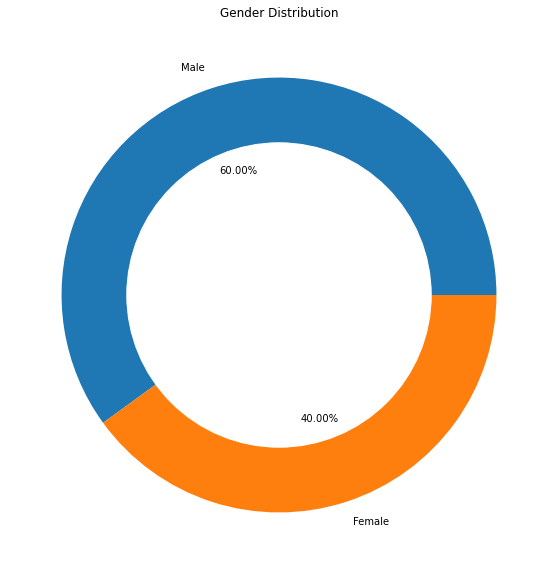

In [14]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gender Distribution')

In [15]:
# 2. Age distribution

Text(0.5, 0, 'Age')

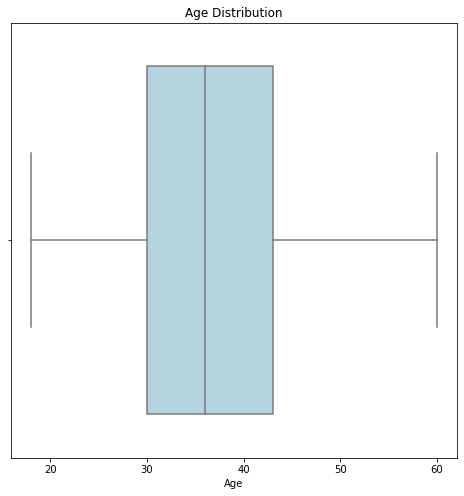

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data["Age"], color='lightblue')
plt.title("Age Distribution")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

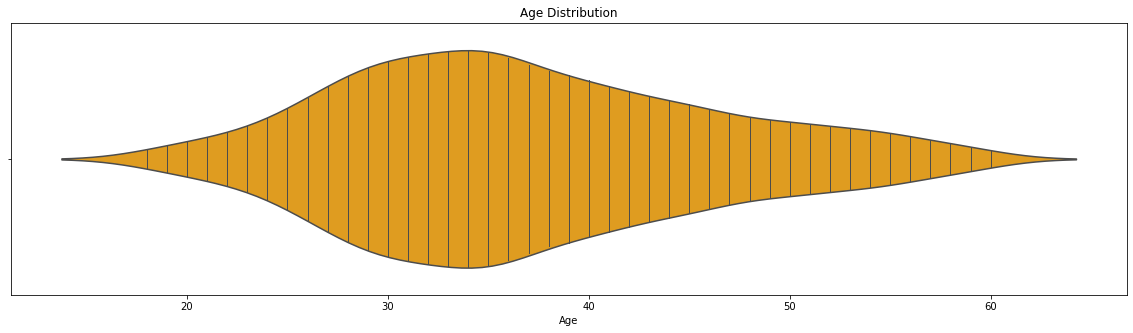

In [17]:
plt.figure(figsize=(20,5))
sns.violinplot(data['Age'], color='orange', inner='stick');
plt.title('Age Distribution')
plt.xlabel('Age')

In [18]:
data['Age'].value_counts()


35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [19]:
data['Age'].max()

60

In [20]:
data['Age'].min()

18

In [21]:
data['Age'].mean()

36.923809523809524

In [22]:
data['Age'].mode()

0    35
Name: Age, dtype: int64

In [23]:
# let's check some target variables

In [24]:
total = data["Attrition"].value_counts()
total

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

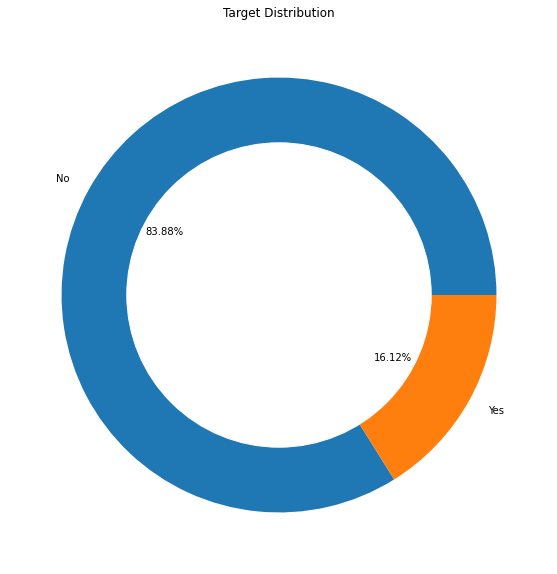

In [25]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Distribution')

In [26]:
# target variable is highly unbalanced

Text(0.5, 1.0, 'MaritalStatus and Attrition')

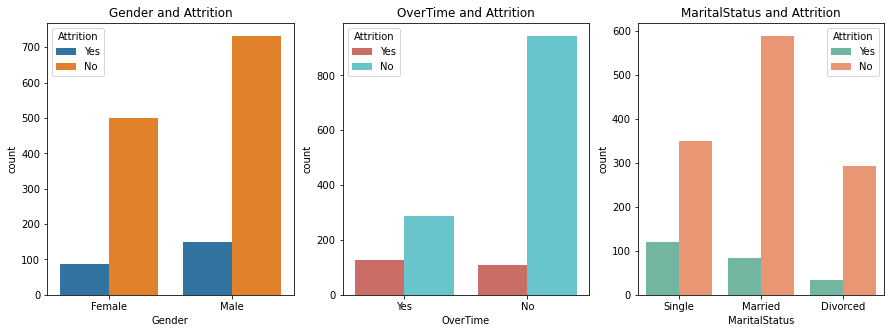

In [27]:
fig, axes = plt.subplots(1, 3,  figsize=(15, 5))
sns.countplot(data["Gender"], hue=data['Attrition'], ax=axes[0])
axes[0].set_title("Gender and Attrition")
sns.countplot(data["OverTime"], hue=data['Attrition'], palette='hls', ax=axes[1])
axes[1].set_title('OverTime and Attrition')
sns.countplot(data["MaritalStatus"], hue=data['Attrition'], palette='Set2', ax=axes[2])
axes[2].set_title('MaritalStatus and Attrition')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

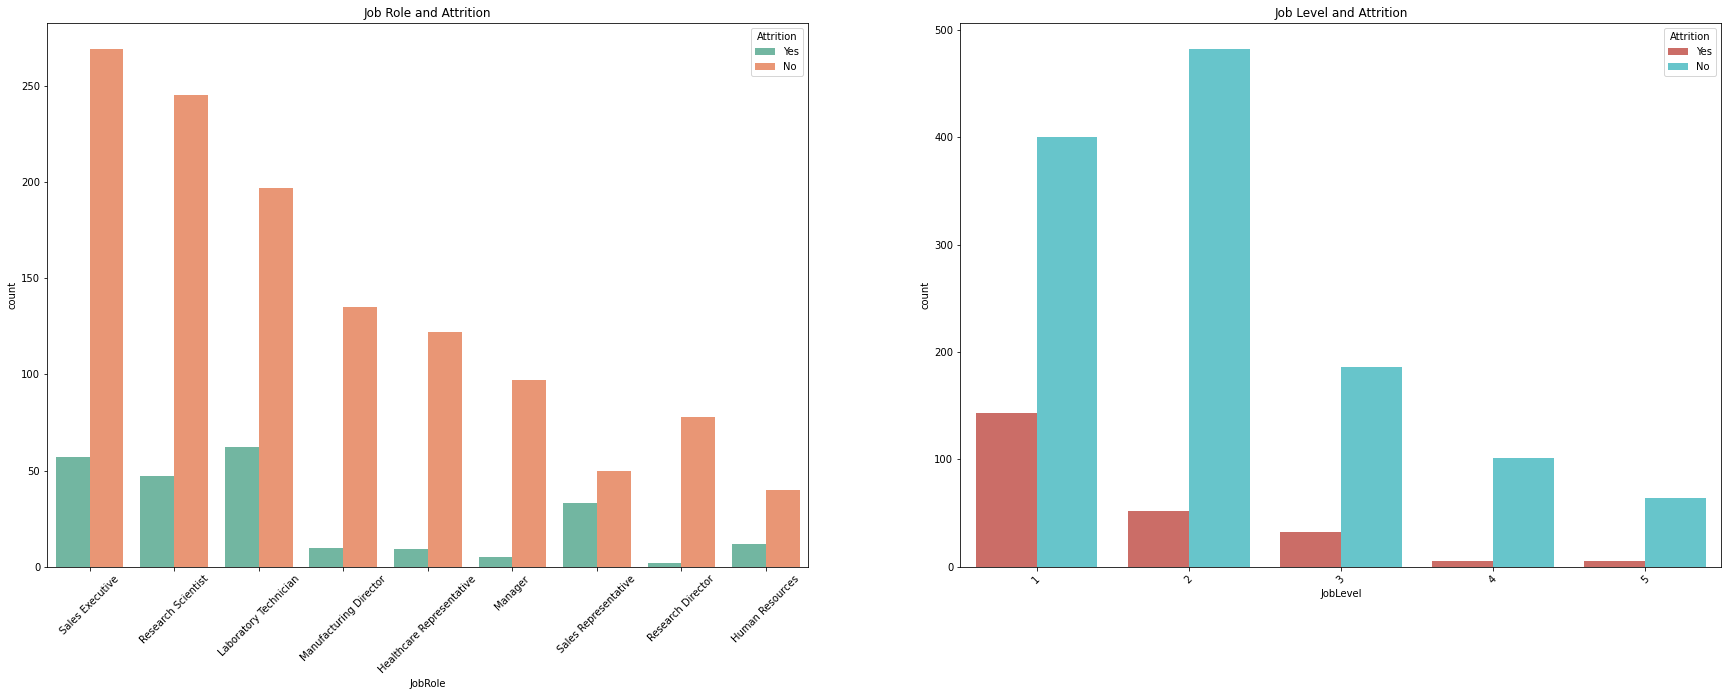

In [28]:
fig, axes = plt.subplots(1, 2,  figsize=(30, 10))

a = sns.countplot(data["JobRole"], hue=data['Attrition'], ax=axes[0], palette='Set2')
axes[0].set_title("Job Role and Attrition")
a.set_xticklabels(a.get_xticklabels(), rotation=45)
b = sns.countplot(data["JobLevel"], hue=data['Attrition'], palette='hls', ax=axes[1])
axes[1].set_title('Job Level and Attrition')
b.set_xticklabels(b.get_xticklabels(), rotation=45)
#c = sns.countplot(data["Work_accident"], hue=data['Attrition'], ax=axes[2])
#axes[2].set_title('Work accident and Attrition')
#c.set_xticklabels(c.get_xticklabels(), rotation=45)

<AxesSubplot:>

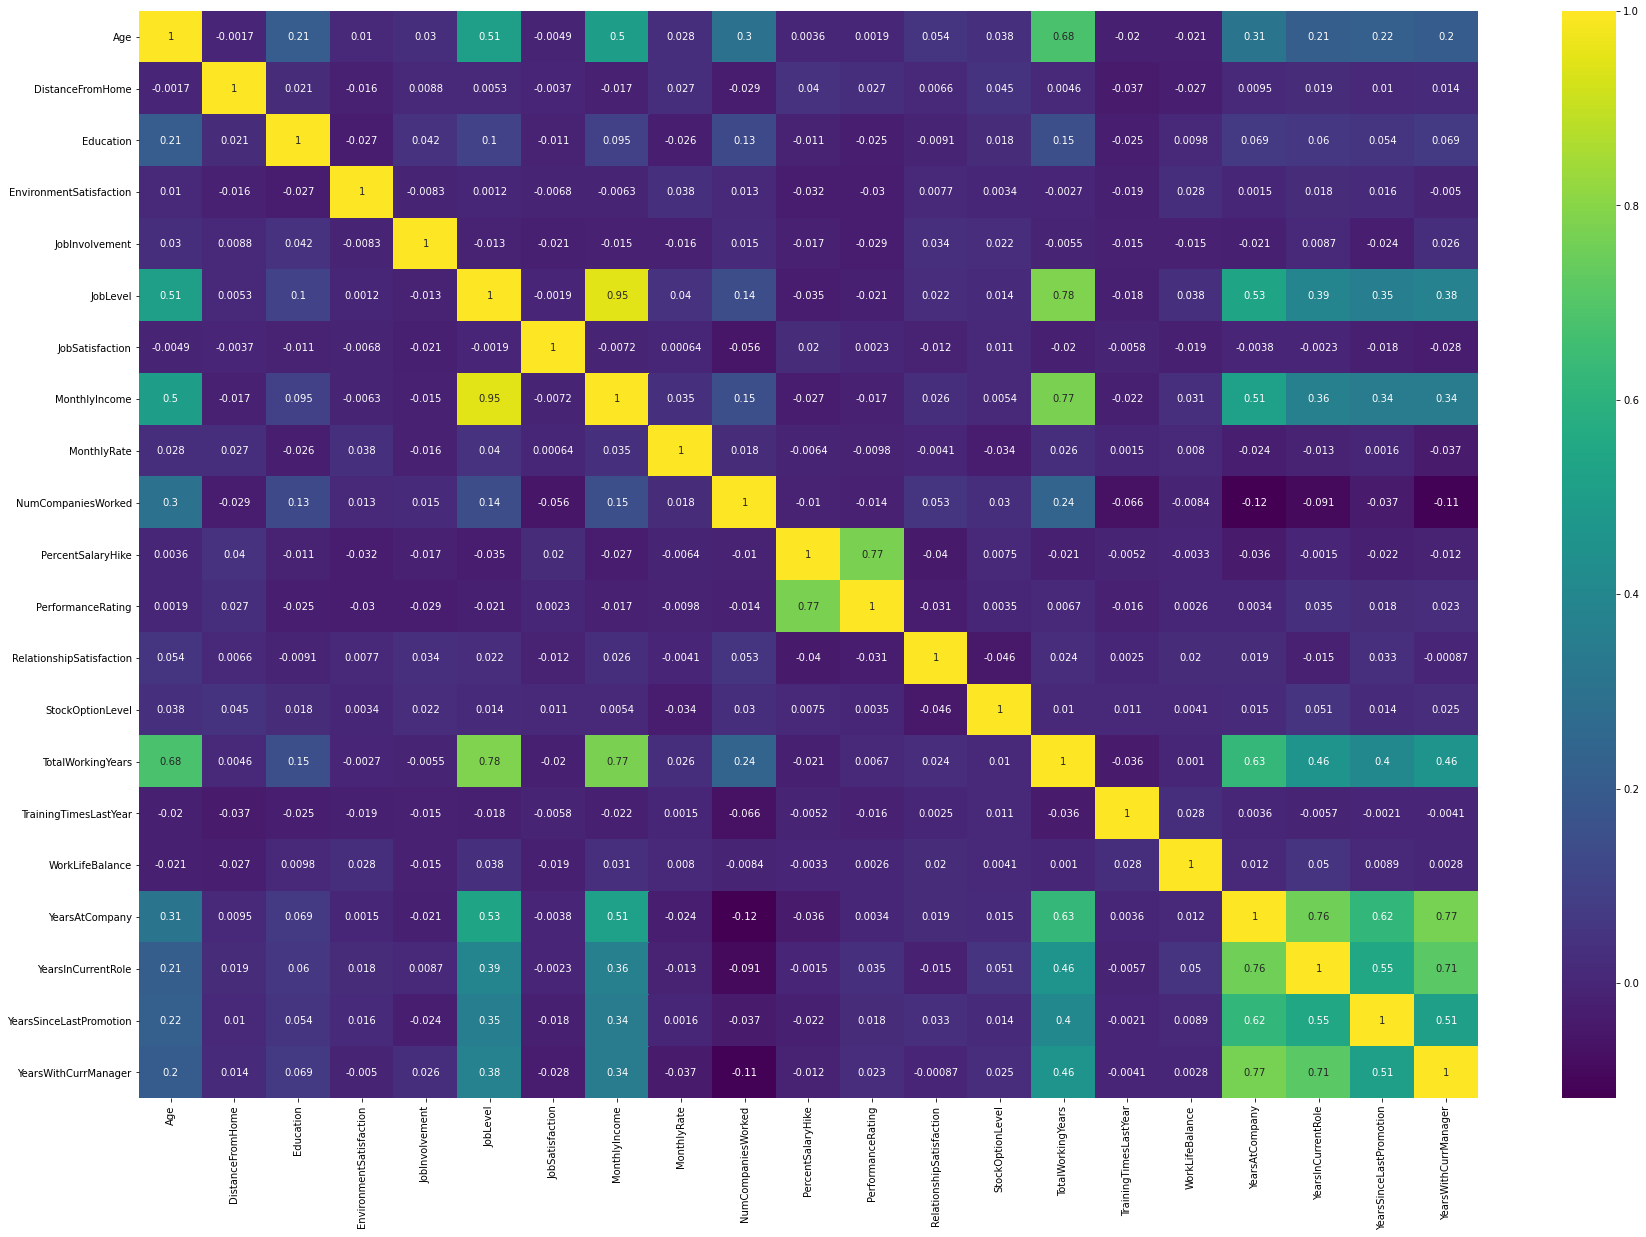

In [29]:
fig_data_temp = data.drop('StandardHours',axis=1)
plt.figure(figsize=(30,20))
sns.heatmap(fig_data_temp.corr(),annot=True,cmap="viridis")

In [30]:
# encoding
#These two variables can alter the result of the model score 
#if you perform a label encoder because it misinterprets the distances. 
#Let's develop our own values

In [31]:
col         = 'BusinessTravel'
conditions  = [ data[col] == 'Non-Travel', data[col] == 'Travel_Rarely', data[col] == 'Travel_Frequently']
choices     = [ 0, 1, 2 ]
    
data['BusinessTravel'] = np.select(conditions, choices)
data['BusinessTravel'] = data['BusinessTravel']

In [32]:
col         = 'EducationField'
conditions  = [ data[col] == '12th', data[col] == 'Graduation', data[col] == 'Post-Graduation', data[col] == 'PHD' ]
choices     = [ 0, 1, 2, 3 ]
    
data['EducationField'] = np.select(conditions, choices)
data['EducationField'] = data['EducationField']

In [33]:
#Label Encoder

In [34]:
def label_encoder(data,column):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    data[column]=le.transform(data[column])

In [35]:
label_encoder(data=data,column='Attrition')

In [36]:
label_encoder(data=data,column='Department')

In [37]:
label_encoder(data=data,column='Gender')

In [38]:
label_encoder(data=data,column='JobRole')

In [39]:
label_encoder(data=data,column='MaritalStatus')

In [40]:
label_encoder(data=data,column='OverTime')

In [41]:
label_encoder(data=data,column='Over18')

In [42]:
data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [43]:
#Feature Reduction
#1.Feature Importance

In [44]:
X = data.drop(['Attrition'], 1)
y = data['Attrition']

In [45]:
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)

names = ['Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField',
         'EnvironmentSatisfaction','Gender','JobInvolvement',
         'JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome',            
         'MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating',         
         'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',     
         'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
F_imp = pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)
F_imp.set_index(['column'], inplace=True)

<AxesSubplot:ylabel='column'>

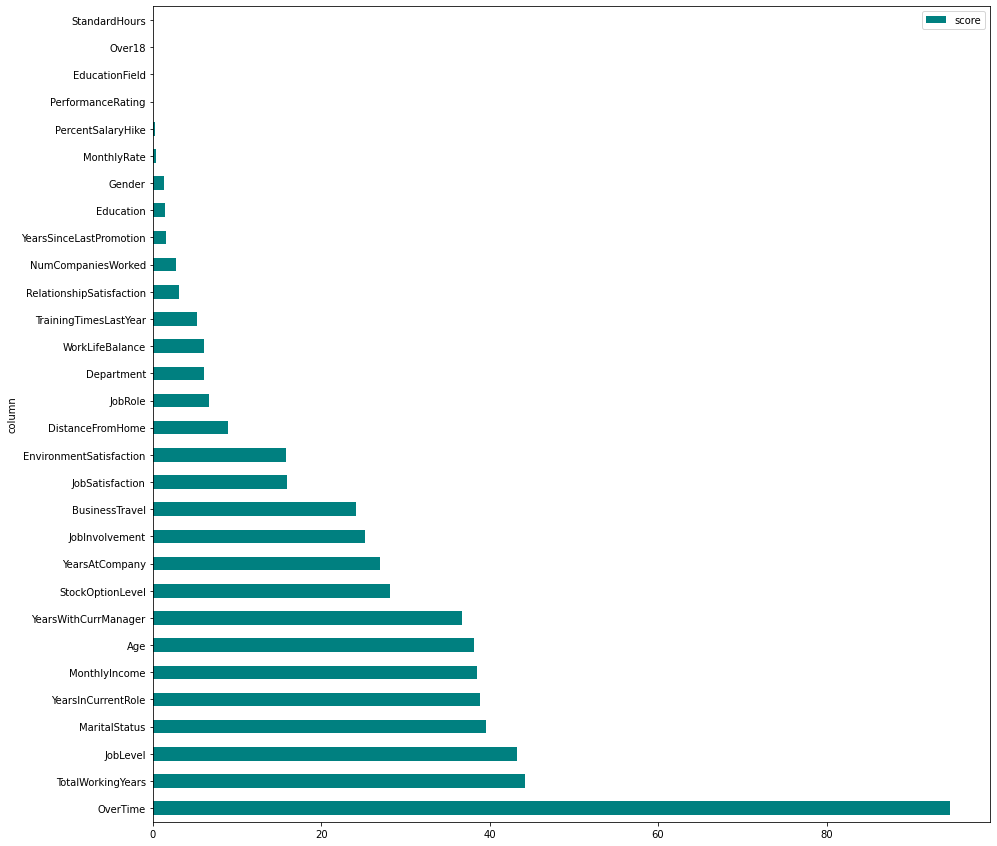

In [46]:
F_imp.plot.barh(y='score', figsize=(15,15), color= 'teal')

In [47]:
#correlation b/w features and target variables

In [48]:
co_ma = data.corr()[['Attrition']]. round(2).sort_values(by = ['Attrition'], ascending = False).drop(['Attrition'])
co_ma

,Attrition
OverTime,0.25
MaritalStatus,0.16
BusinessTravel,0.13
DistanceFromHome,0.08
JobRole,0.07
Department,0.06
NumCompaniesWorked,0.04
Gender,0.03
MonthlyRate,0.02
PerformanceRating,0.00


In [49]:
#2. LINEAL COODEPENDENCE

In [54]:

data_numerical = data.drop(['BusinessTravel','Department','Gender', 'JobRole','StandardHours', 
                            'MaritalStatus', 'OverTime', 'EducationField','Over18', 'Attrition'],1)

<AxesSubplot:>

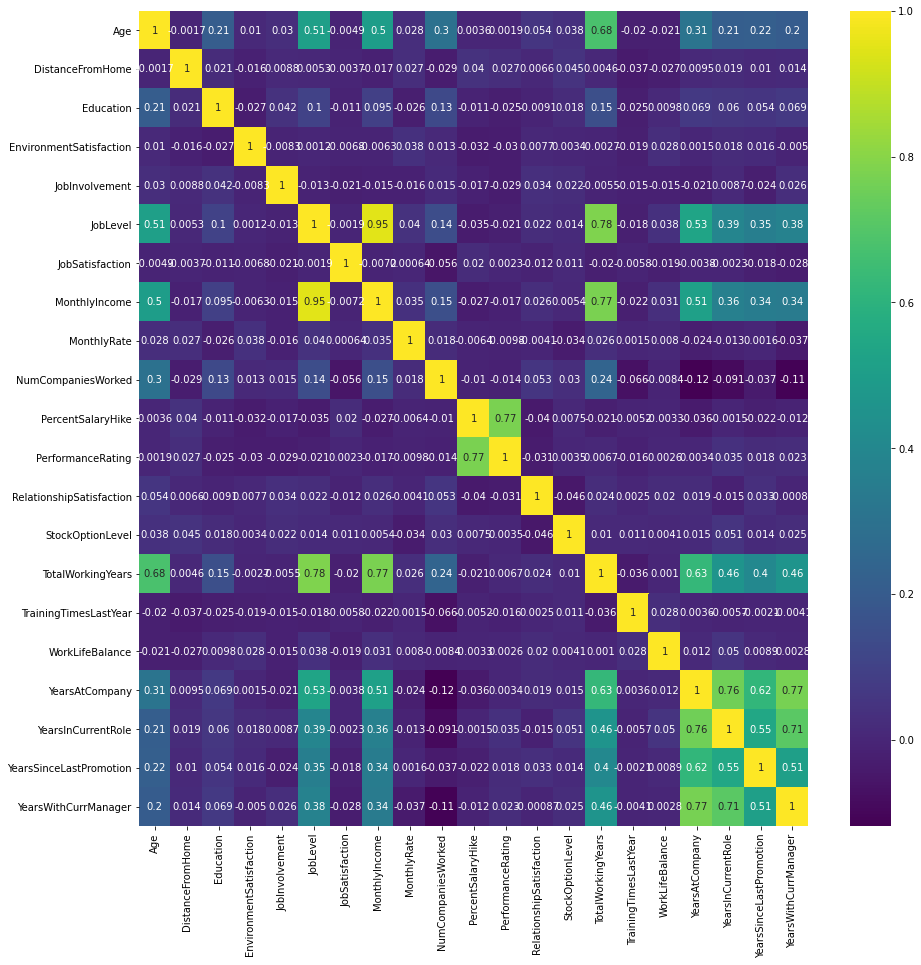

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data_numerical.corr(),annot=True,cmap="viridis")

interval columns not set, guessing: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


<AxesSubplot:>

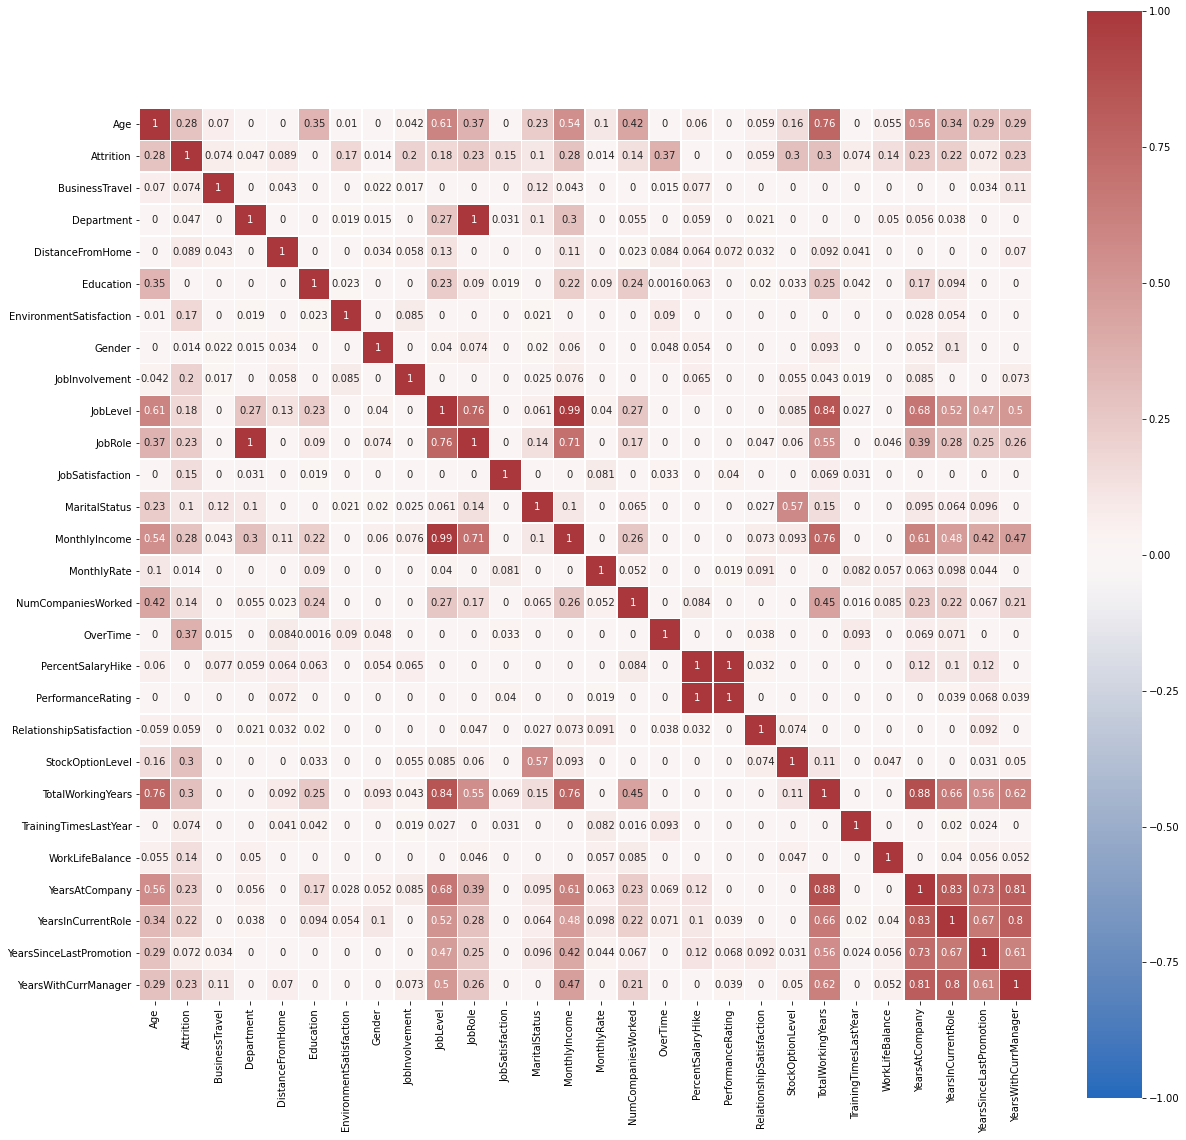

In [56]:
import phik
phik_matrix = data.phik_matrix()

plt.figure(figsize=(20,20))
sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.color_palette("vlag", as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5)

In [57]:
#FEATURES TRANSFORMATION

In [58]:
data['promedio'] = (data['TotalWorkingYears'] + data['Age'])/2

In [59]:
#RANDOM_OVER_SAMPLER

In [64]:
X = data[['OverTime', 'MaritalStatus',  'DistanceFromHome', 'JobRole', 'JobLevel', 'EnvironmentSatisfaction', 'promedio', 'JobSatisfaction','PercentSalaryHike']]
y = data['Attrition']

In [65]:
data['promedio']

0       24.5
1       29.5
2       22.0
3       20.5
4       16.5
        ... 
1465    26.5
1466    24.0
1467    16.5
1468    33.0
1469    20.0
Name: promedio, Length: 1470, dtype: float64

In [69]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,y,test_size=validation_size,
                                                                    random_state=seed)

In [70]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, Y_train)

Text(0.5, 1.0, 'RandomOverSampler')

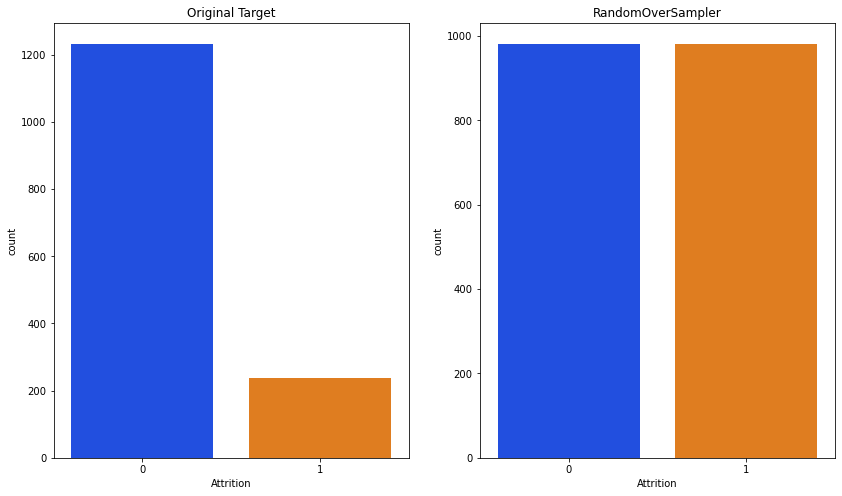

In [71]:
fig, axes = plt.subplots(1, 2, figsize= (14,8))

k = sns.countplot(ax=axes[0], x ='Attrition', data = data, palette='bright')
axes[0].set_title('Original Target')


r = sns.countplot(ax=axes[1], x =  y_train_ros, data = data, palette='bright')
axes[1].set_title('RandomOverSampler')

In [72]:
# models and predictions

In [107]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True) 
import sys
import os 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import AdaBoostClassifier


In [148]:
#A. logistic regression

Accuracy_score: 0.7244897959183674
Accuracy: 72.45 %
Error: 27.55 %
Confusion_matrix: [[185  66]
 [ 15  28]]
Recall_score: 0.298
F1_score: 0.409
Roc_auc_score: 0.6941072917631799


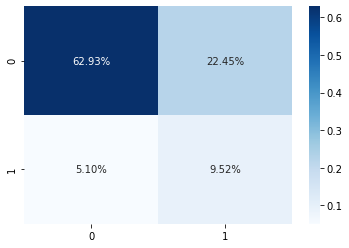

In [73]:
model = linear_model.LogisticRegression(C = 200, max_iter = 20, solver='sag')
model.fit(X_train_ros, y_train_ros)
predictions = model.predict(X_test)
print('Accuracy_score:', accuracy_score(Y_test, predictions))
Accuracy = accuracy_score(Y_test, predictions)
error = 1 - Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix = confusion_matrix(Y_test, predictions)
print('Confusion_matrix:', c_matrix)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(predictions, Y_test), 3))
print("F1_score:", round(f1_score(predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, predictions))
Recall_Reg_log = round(recall_score(predictions, Y_test), 3)
Roc_Reg_log =  round(roc_auc_score(Y_test, predictions), 3)
FNreg_Reg_log = 14
TPreg_Reg_log = 37

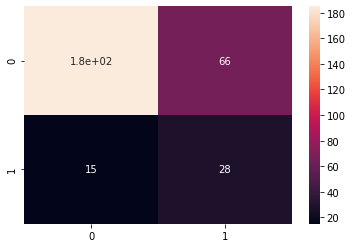

In [74]:
sns.heatmap(c_matrix, annot=True);

In [75]:
#B. Random Forrest Classifier

Accuracy_score: 0.7653061224489796
Accuracy: 76.53 %
Error: 23.47 %
Confusion_matrix: [[202  49]
 [ 20  23]]
Recall_score: 0.319
F1_score: 0.4
Roc_auc_score: 0.6698322987121281


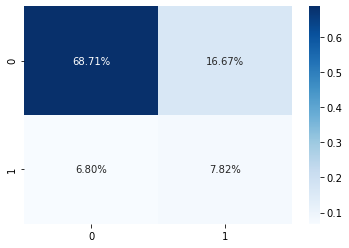

In [76]:
rnd_clf = RandomForestClassifier(n_estimators = 35, max_leaf_nodes = 9, max_depth = 9, random_state= 42) 

rnd_clf.fit(X_train_ros, y_train_ros)

y_pred_rf = rnd_clf.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, y_pred_rf))
Accuracy = accuracy_score(Y_test, y_pred_rf)
error = 1 -Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print('Confusion_matrix:', c_matrix_rf)
sns.heatmap(c_matrix_rf/np.sum(c_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(y_pred_rf, Y_test), 3))
print("F1_score:", round(f1_score(y_pred_rf, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, y_pred_rf))
Recall_RandomForest =  round(recall_score(y_pred_rf, Y_test), 3)
Roc_RandomForest =  round(roc_auc_score(Y_test, y_pred_rf), 3)
FN_RandomForest = 17
TP_RandomForest = 34

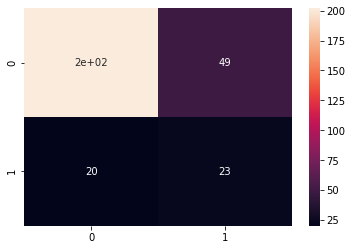

In [77]:
sns.heatmap(c_matrix_rf, annot=True);

In [78]:
#C. Decision Tree

Accuracy_score: 0.8095238095238095
Accuracy: 80.95 %
Error: 19.05 %
Confusion_matrix: [[225  26]
 [ 30  13]]
Recall_score: 0.333
F1_score: 0.317
Roc_auc_score: 0.5993699620124154


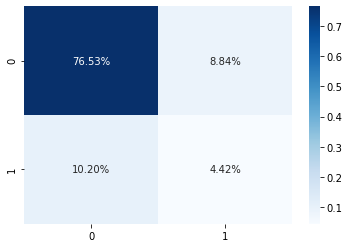

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ros, y_train_ros)
dtc_predictions = dtc.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, dtc_predictions))
Accuracy = accuracy_score(Y_test, dtc_predictions)
error = 1 - Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_dtc = confusion_matrix(Y_test, dtc_predictions)
print('Confusion_matrix:', c_matrix_dtc)
sns.heatmap(c_matrix_dtc/np.sum(c_matrix_dtc), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(dtc_predictions, Y_test), 3))
print("F1_score:", round(f1_score(dtc_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, dtc_predictions))
Recall_DecisionTree = round(recall_score(dtc_predictions, Y_test), 3)
Roc_DecesionTree =  round(roc_auc_score(Y_test, dtc_predictions), 3)
FN_DecesionTree = 31
TP_DecesionTree = 20

In [82]:
#D. KNN

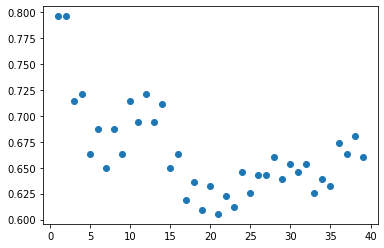

In [83]:
n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_ros, y_train_ros)
knn_predictions = knn.predict(X_test)
k_range = range(1, 40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_ros, y_train_ros)
    
    scores.append(knn.score(X_test, Y_test))

plt.scatter(k_range, scores);

Accuracy_score: 0.7959183673469388
Accuracy: 79.59 %
Error: 20.41 %
Confusion_matrix: [[227  24]
 [ 36   7]]
Recall_score: 0.226
F1_score: 0.189
Roc_auc_score: 0.5335865838969703


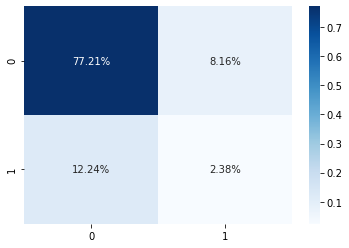

In [85]:
print('Accuracy_score:', accuracy_score(Y_test, knn_predictions))
Accuracy = accuracy_score(Y_test, knn_predictions)
error = 1 - Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_knn = confusion_matrix(Y_test, knn_predictions)
print('Confusion_matrix:', c_matrix_knn)
sns.heatmap(c_matrix_knn/np.sum(c_matrix_knn), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(knn_predictions, Y_test), 3))
print("F1_score:", round(f1_score(knn_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, knn_predictions))
Recall_KNN = round(recall_score(knn_predictions, Y_test), 3)
Roc_KNN =  round(roc_auc_score(Y_test, knn_predictions), 3)
FN_KNN = 35
TP_KNN = 16

In [86]:
#E. ADA Boost

Accuracy_score: 0.7721088435374149
Accuracy: 77.21 %
Error: 22.79 %
Confusion_matrix: [[201  50]
 [ 17  26]]
Recall_score: 0.342
F1_score: 0.437
Roc_auc_score: 0.7027239877698508


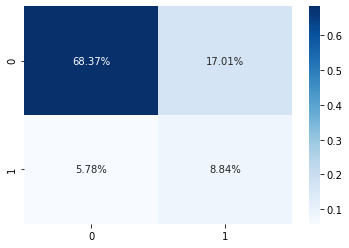

In [87]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(base_estimator=estimator,
                            n_estimators=50,
                            random_state=42)

ada_clf.fit(X_train_ros, y_train_ros)
ada_predictions = ada_clf.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, ada_predictions))
Accuracy = accuracy_score(Y_test, ada_predictions)
error = 1 - Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_ada = confusion_matrix(Y_test, ada_predictions)
print('Confusion_matrix:', c_matrix_ada)
sns.heatmap(c_matrix_ada/np.sum(c_matrix_ada), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(ada_predictions, Y_test), 3))
print("F1_score:", round(f1_score(ada_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, ada_predictions))
Recall_Adaboost = round(recall_score(ada_predictions, Y_test), 3)
Roc_Adaboost =  round(roc_auc_score(Y_test, ada_predictions),3)
FN_Adaboost = 11
TP_Adaboost = 40

<AxesSubplot:>

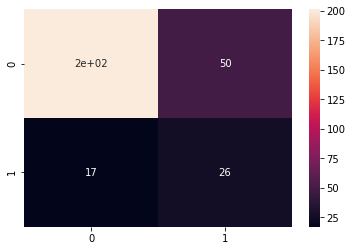

In [88]:
sns.heatmap(c_matrix_ada, annot=True)

In [89]:
#F. XG Boost

Accuracy_score: 0.7925170068027211
Accuracy: 79.25 %
Error: 20.75 %
Confusion_matrix: [[212  22]
 [ 39  21]]
Recall_score: 0.35
F1_score: 0.408
Roc_auc_score: 0.6664968034837395


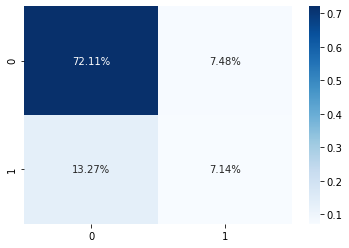

In [91]:
xgb_clas = xgboost.XGBRFClassifier(random_state=42,n_estimators=128)
xgb_clas.fit(X_train_ros, y_train_ros)
xgb_predictions = xgb_clas.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, xgb_predictions))
Accuracy = accuracy_score(Y_test, xgb_predictions)
error = 1 -Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_xgb= confusion_matrix(xgb_predictions, Y_test)
print('Confusion_matrix:', c_matrix_xgb)
sns.heatmap(c_matrix_xgb/np.sum(c_matrix_xgb), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(xgb_predictions, Y_test), 3))
print("F1_score:", round(f1_score(xgb_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, xgb_predictions))
Recall_XGBoost = round(recall_score(xgb_predictions, Y_test), 3)
Roc_XGBoost =  round(roc_auc_score(Y_test, xgb_predictions), 3)
FN_XGBoost = 30
TP_XGBoost = 21

In [92]:
#G. KMean Clustering

Accuracy_score: 0.3163265306122449
Accuracy: 31.63 %
Error: 68.37 %
Confusion_matrix: [[ 64  14]
 [187  29]]
Recall_score: 0.134
F1_score: 0.224
Roc_auc_score: 0.4646993421662188


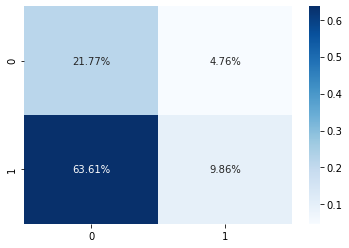

In [121]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,random_state=0)
kmean_predictions = model.fit_predict(X_test)

'''from sklearn.metrics import silhouette_score
print("Silhouette Score: ", silhouette_score(X_test,kmean_predictions))'''

print('Accuracy_score:', accuracy_score(Y_test, kmean_predictions))
Accuracy = accuracy_score(Y_test, kmean_predictions)
error = 1 -Accuracy
print("Accuracy:", round(Accuracy*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_kmean= confusion_matrix(kmean_predictions, Y_test)
print('Confusion_matrix:', c_matrix_kmean)
sns.heatmap(c_matrix_kmean/np.sum(c_matrix_kmean), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(kmean_predictions, Y_test), 3))
print("F1_score:", round(f1_score(kmean_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, kmean_predictions))
Recall_KMean = round(recall_score(xgb_predictions, Y_test), 3)
Roc_KMean =  round(roc_auc_score(Y_test, kmean_predictions), 3)

<AxesSubplot:>

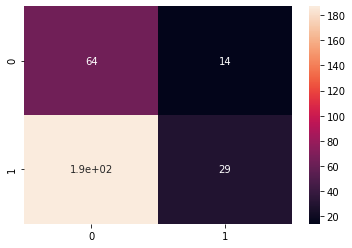

In [122]:
sns.heatmap(c_matrix_kmean, annot=True)